#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

#Loading Dataset

In [ ]:
df = pd.read_csv('/content/crop_dataset_rainfall_fertilizers.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [ ]:
df['Season'] = df['Season'].str.strip()
seasons = df['Season'].unique()
seasons

array(['Whole Year', 'Kharif', 'Rabi', 'Autumn', 'Summer', 'Winter'],
      dtype=object)

In [ ]:
df['Crop'] = df['Crop'].str.strip()
crops = df['Crop'].unique()
crops

NameError: name 'df' is not defined

In [ ]:
df['Crop'].value_counts()

Crop
Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Other Kharif pulses       382
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Other  Rabi pulses        355
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    297
Sweet potato              273
Garli

#State V/S Yield Comparison

In [ ]:
state = (df['State'].unique())
state

array(['Assam', 'Karnataka', 'Kerala', 'Meghalaya', 'West Bengal',
       'Puducherry', 'Goa', 'Andhra Pradesh', 'Tamil Nadu', 'Odisha',
       'Bihar', 'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'Mizoram',
       'Punjab', 'Uttar Pradesh', 'Haryana', 'Himachal Pradesh',
       'Tripura', 'Nagaland', 'Chhattisgarh', 'Uttarakhand', 'Jharkhand',
       'Delhi', 'Manipur', 'Jammu and Kashmir', 'Telangana',
       'Arunachal Pradesh', 'Sikkim'], dtype=object)

In [ ]:
yield_per_state = []
for s in state :
  yield_per_state.append(df[df['State']==s]['Yield'].sum())

In [ ]:
print(yield_per_state)
len(yield_per_state)

[160612.64836185, 151391.86780803898, 147710.353263453, 1868.333573616, 291986.752178661, 232163.600840017, 87275.95499999999, 229735.184723148, 185813.28164790702, 2387.350671884, 3114.9427709740003, 5471.634562565, 2921.854255047, 3388.7931089129993, 1068.805857151, 1926.5684359329998, 4168.818512641999, 3491.154047808, 1170.0898315489999, 1891.456559522, 2344.3458286249997, 1799.560319468, 2853.699790557, 974.625172735, 2663.09, 2316.347595246, 825.3802240790001, 39508.727732884, 1090.637611814, 278.62547619]


30

<Axes: >

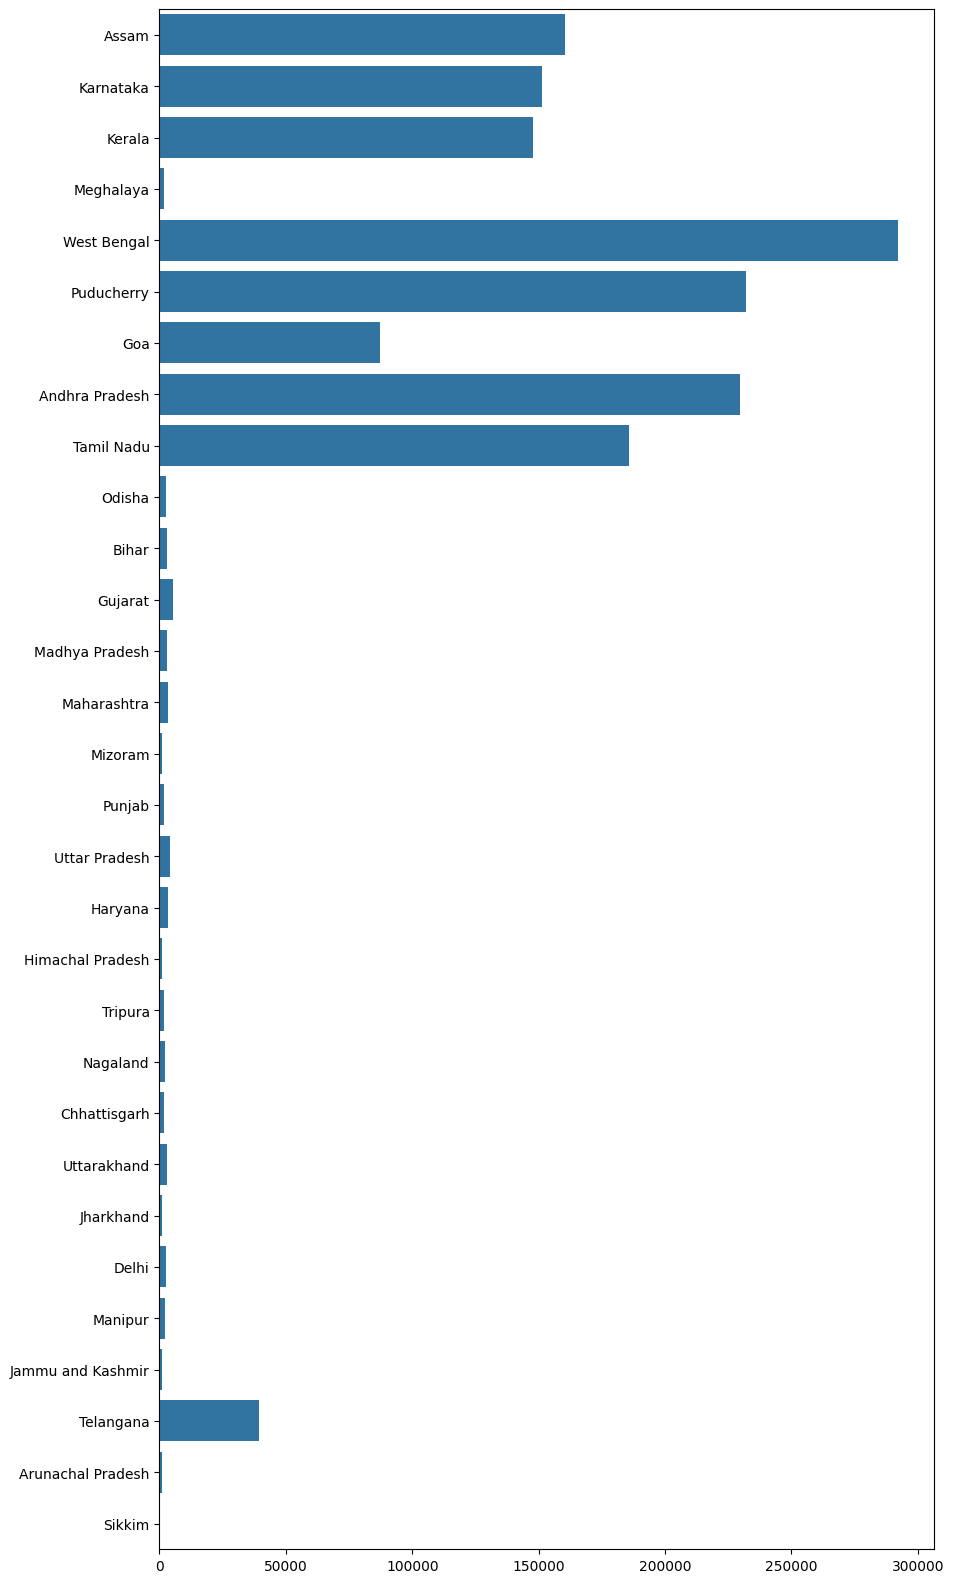

In [ ]:
plt.figure(figsize = (10,20))
sns.barplot(y=state, x=yield_per_state)

#Crop V/S Yield Comparision

In [ ]:
crops = (df['Crop'].unique())
crops

array(['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut', 'Cotton(lint)',
       'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta',
       'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric',
       'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander',
       'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi',
       'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower',
       'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)',
       'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth'],
      dtype=object)

In [ ]:
yield_per_crop = []
for crop in crops :
    yield_per_crop.append(df[df['Crop']==crop]['Yield'].sum())

In [ ]:
yield_per_crop

[335.92894083199997,
 491.412660548,
 208.082848199,
 1488144.0341840002,
 855.393000647,
 870.820145763,
 429.46976772899995,
 1367.5260780539998,
 145.970591513,
 3341.535578018,
 1131.73274107,
 81.316479477,
 6014.376181259,
 277.034839149,
 8372.318752989999,
 417.947828179,
 2655.537965599,
 419.04871510900006,
 372.83020465199996,
 31295.100843820997,
 2522.735259898,
 3350.127598106,
 768.297863156,
 1120.657270157,
 1092.772110937,
 1271.9900913830002,
 104.530183425,
 12.458289973000001,
 128.99184653700001,
 1136.2214872260001,
 2080.831108154,
 986.7130220659999,
 171.70696712,
 550.191616613,
 605.2733272629999,
 418.13871108699993,
 6578.5263242400015,
 378.03483162,
 473.87539464500003,
 59.170555459000006,
 227.821574158,
 392.89589654299994,
 267.214149519,
 95.566440389,
 203.993386897,
 411.932115733,
 428.107016641,
 514.347417643,
 225.441772547,
 124.03369622599999,
 108.972005493,
 57.871218762000005,
 59.96812521100001,
 8.599253987,
 49.059486855]

<Axes: >

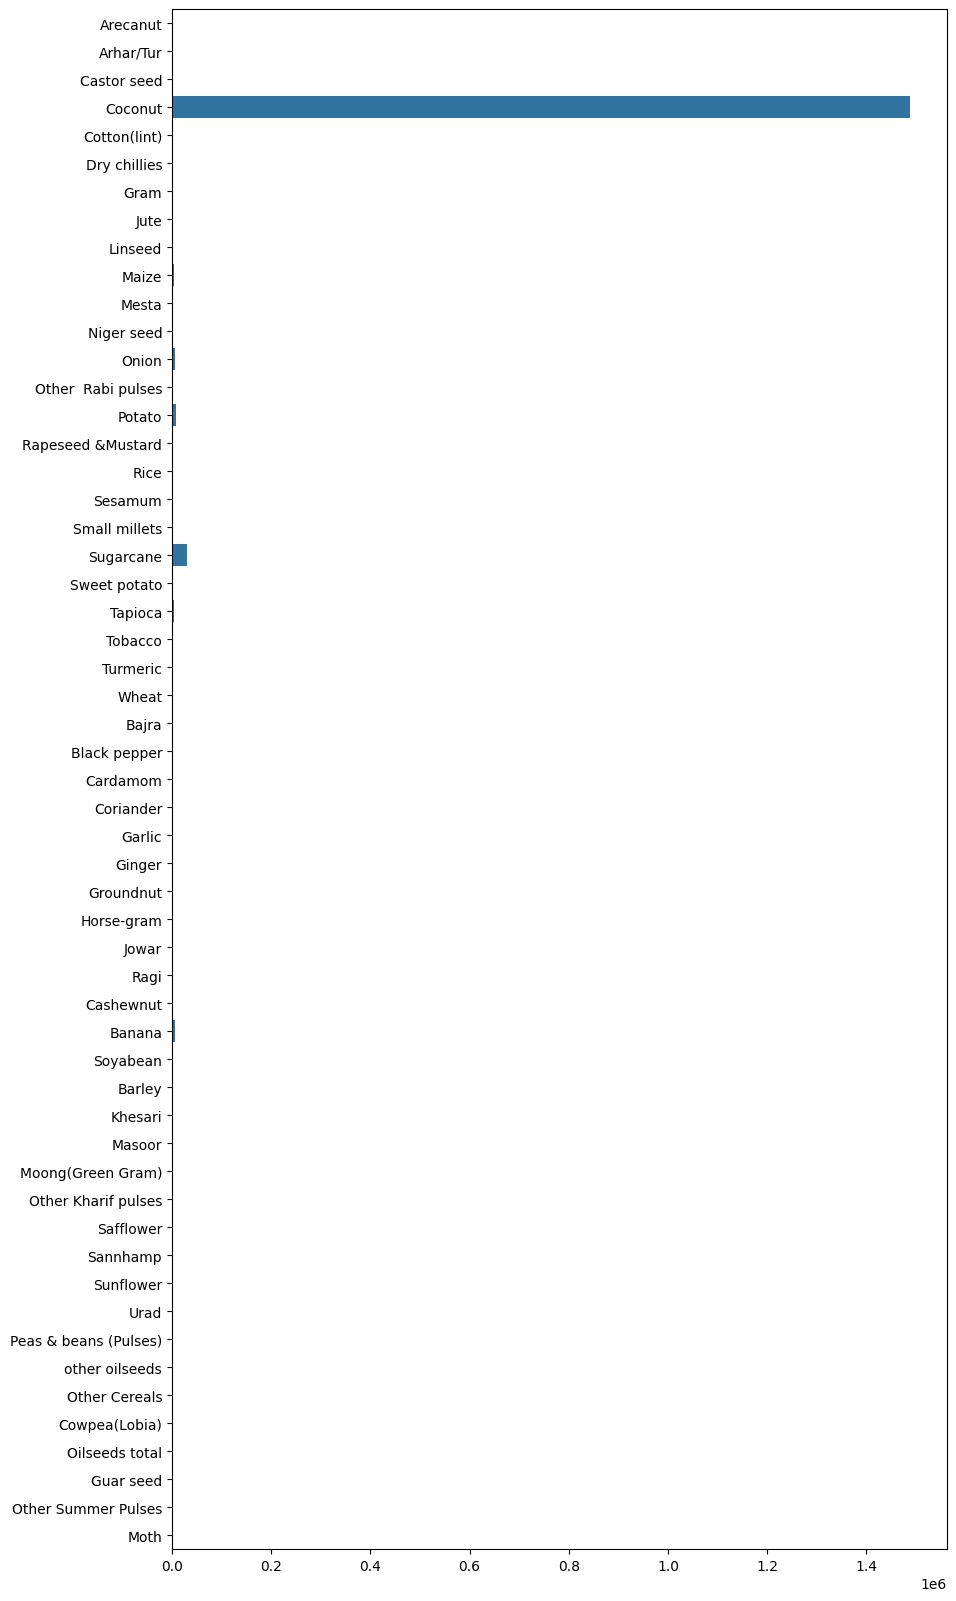

In [ ]:
plt.figure(figsize = (10,20))
sns.barplot(y=crops, x=yield_per_crop)

#Correlation between features

In [ ]:
C_mat = df.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(C_mat, vmax= .8, square = True)
plt.show()

ValueError: could not convert string to float: 'Arecanut'

from the heatmap we can see that Area, pesticide, fertilizers are closely related features, also there is no need of Year prediction of yield and there is no need of production either

In [ ]:
#dropping Crop_Year and Production
df = df.drop('Production', axis=1)
df = df.drop('Crop_Year', axis=1)
df.info()

#Train Test Split

In [ ]:
#train test split
X = df.drop('Yield', axis = 1)
Y = df['Yield']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [ ]:
X_train.info()

Now we have Crop, Season and State which are objects and other values which are float. The model only understands numerical data so we need to standardize our dataset for training

#One Hot Encoding
Each category will be represented by binary vectors
For example, if you have three categories: 'red', 'blue', and 'green':

'red' might be represented as [1, 0, 0]

'blue' might be represented as [0, 1, 0]

'green' might be represented as [0, 0, 1]


#Standard Scaling
This transformation ensures that the distribution of the feature values has a mean of 0 and a standard deviation of 1, which can be beneficial for algorithms that rely on input features being on similar scales, such as many machine learning algorithms, including linear regression, logistic regression, and support vector machines. It helps in speeding up convergence during optimization and prevents features with larger scales from dominating those with smaller scales.

In [ ]:
ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()
X_train.head()

Col [0,1,2] are objects so use onehotencoder on them and use standardscaler for [3,4,5,6] which are numerical values

In [ ]:
preprocessor = ColumnTransformer(
    transformers = [
        ('onehotencoder', ohe, [0,1,2]),
        ('standardization', scaler, [3,4,5,6])
    ],
    remainder = 'passthrough'
)

In [ ]:
preprocessor

#Store the transformed training and testing data into separate variables

In [ ]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy  = preprocessor.fit_transform(X_test)

In [ ]:
X_train_dummy

#Train variety of models with the training data and select the one with best score and less error

In [ ]:
models = {
    'lr'  : LinearRegression(),
    'lss' : Lasso(),
    'rg'  : Ridge(),
    'Knr' : KNeighborsRegressor(n_neighbors=5),
    'dtr' : DecisionTreeRegressor(),
    'rfr' : RandomForestRegressor(max_depth = 10, random_state = 0, n_estimators = 100),
}


for name, mod in models.items():
  mod.fit(X_train_dummy, Y_train)
  Y_pred = mod.predict(X_test_dummy)
  print(f"{name} MSE : {mean_squared_error(Y_test, Y_pred)} Score : {r2_score(Y_test,Y_pred)}")

#KNR performs best with R2 = 0.9261144868566538 and MSE = 57412.88732806002

In [ ]:
#Creating an instance of KNeigborsRegressor
Knr = KNeighborsRegressor(n_neighbors = 5)
Knr.fit(X_train_dummy, Y_train)

Create a function which returns prediction by the model

In [ ]:
def prediction(Crop, Season, State, Area, Annual_Rainfall, Fertilizer, Pesticide):
  features = np.array([[Crop, Season, State, Area, Annual_Rainfall, Fertilizer, Pesticide]])
  transformed_features = preprocessor.transform(features)
  predicted_Value = Knr.predict(transformed_features).reshape(1,-1)
  return predicted_Value[0]

In [ ]:
X_train.head(1)

#Testing prediction against a known dataset

In [ ]:
Crop = 'Onion'
Season = 'Rabi'
State = 'Chhattisgarh'
Area = 87.0
Annual_Rainfall = 1418.3
Fertilizer = 12570.63
Pesticide = 23.49

result = prediction(Crop, Season, State, Area, Annual_Rainfall, Fertilizer, Pesticide)

In [ ]:
result
#  actual yield = 20.33
#  predicted yield = 19.33

In [ ]:
#prediction for a random mix of data

Crop = 'Coconut'
Season = 'Rabi'
State = 'Assam'
Area = 75259
Annual_Rainfall = 1418.3
Fertilizer = 75755.32
Pesticide = 23.49

result = prediction(Crop, Season, State, Area, Annual_Rainfall, Fertilizer, Pesticide)

In [ ]:
result

In [ ]:
import pickle

In [ ]:
filename = 'yield_prediction_trained.sav'
pickle.dump(Knr, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('/content/yield_prediction_trained.sav', 'rb'))

In [ ]:
filename = 'processor.sav'
pickle.dump(preprocessor, open(filename, 'wb'))

In [ ]:
processor = pickle.load(open('/content/processor.sav', 'rb'))

In [ ]:
def prediction(Crop, Season, State, Area, Annual_Rainfall, Fertilizer, Pesticide):
  features = np.array([[Crop, Season, State, Area, Annual_Rainfall, Fertilizer, Pesticide]])
  transformed_features = processor.transform(features)
  predicted_Value = loaded_model.predict(transformed_features).reshape(1,-1)
  return predicted_Value[0]

In [ ]:
#prediction for a random mix of data

Crop = 'Coconut'
Season = 'Rabi'
State = 'Assam'
Area = 75259
Annual_Rainfall = 1418.3
Fertilizer = 75755.32
Pesticide = 23.49

result = prediction(Crop, Season, State, Area, Annual_Rainfall, Fertilizer, Pesticide)

In [ ]:
result